In [76]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
import  numpy as np

#import cv2, numpy as np

In [77]:
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

img_width, img_height = 224,224

#input_shape = ( img_width, img_height, 3)

epochs = 1

batch_size = 1

nb_train_samples = 330

nb_validation_samples = 69

nb_test_samples = 60


In [78]:
model = Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same', strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same', strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same', strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same', strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same', strides=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))



In [79]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [80]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


Found 330 images belonging to 3 classes.
Found 69 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
330/330 [==============================] - 43s 130ms/step - loss: 1.1018 - accuracy: 0.3091 - val_loss: 1.0987 - val_accuracy: 0.3333

In [81]:
# Сохраняем конфигурацию и веса
json_string = model.to_json()
#print(json_string)
json_file = open('test_vgg16_show_layers.json','w')
json_file.write(json_string)
json_file.close()
model.save('test_vgg16_show_layers.hdf5')
model.save_weights('test_vgg16_show_layers.h5')


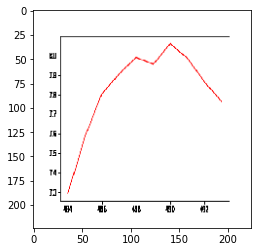

In [82]:
# Посмотрим работу на слоях
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img


jpeg_image_filename = '5.png'
img = load_img(jpeg_image_filename, target_size = (224,224))
plt.imshow(img)

In [83]:
# test
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))


Аккуратность на тестовых данных: 33.33%


In [84]:
#Распознование класса изображения
#Загружаем сохраненную нейросеть
from keras.models import load_model
model = load_model('test_vgg16_show_layers.hdf5')
model.summary()

from tensorflow.python.keras.preprocessing import image
import numpy as np

image_file_name = '5.png'
img = image.load_img(image_file_name, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
print(prediction.shape)
plt.matshow(prediction, cmap='viridis')
classes=['descending', 'ascending', 'peripheral']

print(classes[np.argmax(prediction)])


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_130 (ZeroPadd (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 75, 75, 64)        1792      
_________________________________________________________________
zero_padding2d_131 (ZeroPadd (None, 77, 77, 64)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
zero_padding2d_132 (ZeroPadd (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 5, 5, 128)       

IndexError: too many indices for array